In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
from math import floor
from scipy.optimize import curve_fit as cf
import scipy.stats as stats
from os import listdir
from os.path import isfile, join

plt.style.use('figuras_lucio.mplstyle')


In [40]:
def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

0.5
1
4.0000000000003005e-09
0.5
1
4.0000000000003005e-09
0.5
1
4.0000000000003005e-09
0.5
1
4.0000000000003005e-09
0.5
1
4.0000000000003005e-09


(0.0, 5.000000000000001e-07)

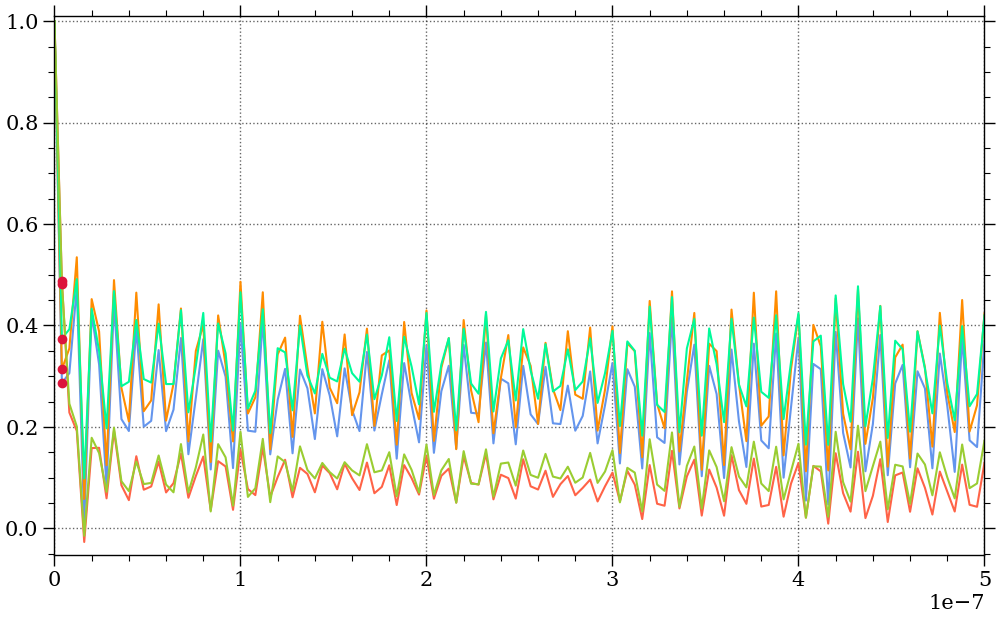

In [41]:
path = f'Iteración 9' # Foldder where measurements are
onlyfiles = [file for file in listdir(path) if isfile(join(path, file))] #isfile returns a boolean if the specified path is a file or not
onlyfiles = onlyfiles[0:5]

fig, ax = plt.subplots()
taus = []
for file in onlyfiles:
    df = pd.read_csv(join(path, file))
    d = df['Mediciónes'].values
    t = df["Tiempo"].values
    acorr = autocorrelation(d)
    acorr = acorr/np.max(acorr)
    tiempos = np.array(t-t[0])
 
    index = np.where(acorr < max(acorr/2))
    tau = tiempos[index[0][0]]  
    taus.append(tau)
    print(taus[-1])

    ax.plot(tiempos,acorr,zorder=1)
    ax.scatter(tiempos[index[0][0]],acorr[index[0][0]],c='crimson',zorder=2)#,label=f'\u03C4 = {np.round(tau,dcmls(tau))}')

ax.set_xlim(0,0.05*10**(-5))